<a href="https://colab.research.google.com/github/geethikad/Assignment1/blob/main/Copy_of_IMDB_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of IMDB reviews

## Importing the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv &json/IMDB Dataset.csv')
df.head()
df = df.sample(5000)
#df = df.iloc[0:5000,:]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Review Frquency Count
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'}) 
vc_df

,Sentiment,Count
0,NaN,2507
1,NaN,2493


## Pre-processing the data

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization



#### Removing punctuation (.!<>{}’,”(/)-\)

In [6]:
df['review']

39281    I think it's incredibly hard to write any kind...
35786    Probably the finest fantasy film ever made. Su...
409      A great Bugs Bunny cartoon from the earlier ye...
42261    Moonwalker is absolutely incredible !!!!!!! Wh...
38539    www.petitiononline.com/19784444/petition.html ...
                               ...                        
4793     I feel conflicted about this film - it is one ...
38522    one of the best and most inspirational movies ...
17295    Amongst the standard one liner type action fil...
12051    When I was a kid of 8, I always watched movies...
3911     I don't know what this movie is about, really....
Name: review, Length: 5000, dtype: object

In [7]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z]", " ") 


# Re ordering columns
df = df[['review','review_processed','sentiment']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
df['review_processed']

39281    I think it s incredibly hard to write any kind...
35786    Probably the finest fantasy film ever made  Su...
409      A great Bugs Bunny cartoon from the earlier ye...
42261    Moonwalker is absolutely incredible         Wh...
38539    www petitiononline com          petition html ...
                               ...                        
4793     I feel conflicted about this film   it is one ...
38522    one of the best and most inspirational movies ...
17295    Amongst the standard one liner type action fil...
12051    When I was a kid of    I always watched movies...
3911     I don t know what this movie is about  really ...
Name: review_processed, Length: 5000, dtype: object

#### Replacing short words

In [9]:
' '.join(["this", "batch" , "is", "awesome"])

'this batch is awesome'

In [10]:
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [11]:
df['review_processed']

39281    think incredibly hard write any kind full scal...
35786    Probably the finest fantasy film ever made Sum...
409      great Bugs Bunny cartoon from the earlier year...
42261    Moonwalker absolutely incredible What else can...
38539    www petitiononline com petition html excellent...
                               ...                        
4793     feel conflicted about this film one the most b...
38522    one the best and most inspirational movies abo...
17295    Amongst the standard one liner type action fil...
12051    When was kid always watched movies and televis...
3911     don know what this movie about really like stu...
Name: review_processed, Length: 5000, dtype: object

#### LowerCase character

In [12]:
word = "Geethika"
word.lower()

'geethika'

In [13]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [14]:
df['review_processed']

39281    think incredibly hard write any kind full scal...
35786    probably the finest fantasy film ever made sum...
409      great bugs bunny cartoon from the earlier year...
42261    moonwalker absolutely incredible what else can...
38539    www petitiononline com petition html excellent...
                               ...                        
4793     feel conflicted about this film one the most b...
38522    one the best and most inspirational movies abo...
17295    amongst the standard one liner type action fil...
12051    when was kid always watched movies and televis...
3911     don know what this movie about really like stu...
Name: review_processed, Length: 5000, dtype: object

#### Remove stop words

In [30]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')


# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even']

# Adding to the list of words
stopw_words = stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df['review_processed']

39281    think incredibly hard write kind full scale re...
35786    probably finest fantasy ever made sumptuous co...
409      great bugs bunny cartoon earlier years bugs pe...
42261    moonwalker absolutely incredible else say mich...
38539    www petitiononline com petition html excellent...
                               ...                        
4793     feel conflicted beautiful films seen provides ...
38522    best inspirational movies different culture se...
17295    amongst standard liner type action films actin...
12051    kid always watched movies television supposed ...
3911     know really like student art school project ne...
Name: review_processed, Length: 5000, dtype: object

#### Lemmatization

In [17]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag -> wordnet tag -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


1) split sentence into words
2) get the detailed POS for each word
3) get shallow POS from detailed POS
4) do lemmatisation for each word
5) join all the words to form sentence 

In [18]:
df['review_processed']

39281    think incredibly hard write kind full scale re...
35786    probably fine fantasy ever make sumptuous colo...
409      great bug bunny cartoon earlier year bug perfo...
42261    moonwalker absolutely incredible else say mich...
38539    www petitiononline com petition html excellent...
                               ...                        
4793     feel conflict beautiful film see provide insig...
38522    best inspirational movie different culture see...
17295    amongst standard liner type action film act lo...
12051    kid always watch movie television suppose favo...
3911     know really like student art school project ne...
Name: review_processed, Length: 5000, dtype: object

#### Plotting Freqent Words

In [19]:
df

,review,review_processed,sentiment
39281,I think it's incredibly hard to write any kind...,think incredibly hard write kind full scale re...,positive
35786,Probably the finest fantasy film ever made. Su...,probably fine fantasy ever make sumptuous colo...,positive
409,A great Bugs Bunny cartoon from the earlier ye...,great bug bunny cartoon earlier year bug perfo...,positive
42261,Moonwalker is absolutely incredible !!!!!!! Wh...,moonwalker absolutely incredible else say mich...,positive
38539,www.petitiononline.com/19784444/petition.html ...,www petitiononline com petition html excellent...,positive
...,...,...,...
4793,I feel conflicted about this film - it is one ...,feel conflict beautiful film see provide insig...,negative
38522,one of the best and most inspirational movies ...,best inspirational movie different culture see...,positive
17295,Amongst the standard one liner type action fil...,amongst standard liner type action film act lo...,positive
12051,"When I was a kid of 8, I always watched movies...",kid always watch movie television suppose favo...,positive


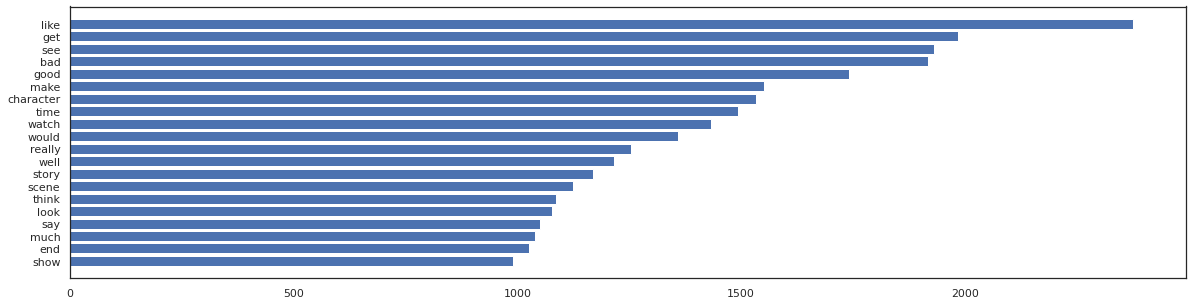

In [20]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#### WordCloud

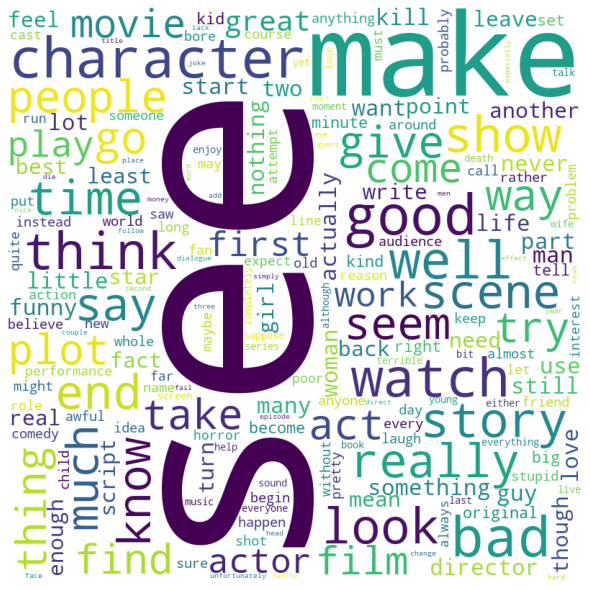

In [21]:
##
## Building a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model

In [22]:
# Importing module
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating sparse matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names()
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
X_train.shape, X_test.shape

((4000, 2500), (1000, 2500))

## Building the ML model

In [24]:
## Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[369 127]
 [130 374]]
The model accuracy is 0.743


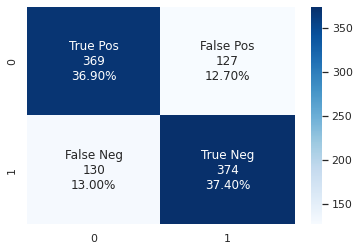

In [26]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

0.7838481662826422

## Feature Importance

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 15)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

#featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)},columns = ['Word','Importance'])



0.7

In [29]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
8,0.190050,bad
46,0.066919,great
125,0.066371,waste
34,0.033495,excellent
7,0.031622,awful
...,...,...
29,0.001407,writer
39,0.001313,straight
1,0.001231,though
32,0.001095,time
